##**08. 파이썬 추천 시스템 패키지 - Surprise**


###**Surprise 패키지 소개**
파이썬 기반의 추천시스템 전용 패키지

In [2]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095453 sha256=3b02d570ea350f285ddb27d73669204dcc4e4acb2eedcee6051e94cbe917b366
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


- 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있다.
- Surprise의 핵심 API는 사이킷런의 핵심 API와 유사한 API 명으로 작성됨
  - fit(), predict() API로 추천 데이터 학습과 예측, train_test_split()으로 추천 학습 데이터 세트와 예측 데이터 세트 분리, cross_validate(), GridSearchCV 클래스를 통해 추천시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능을 제공

###**Surprise를 이용한 추천 시스템 구축**


In [3]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

Surprise에서 데이터 로딩은 Dataset클래스를 이용해서만 가능함
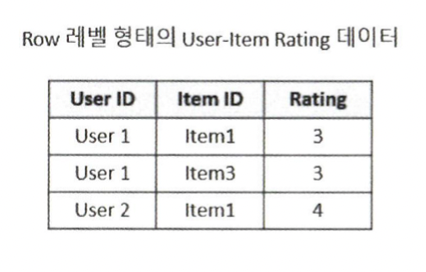

Surprise는 무비렌즈 사이트에서 제공하는 과거 버전의 데이터 세트를 가져오는 API를 제공
- 로딩한 데이터 세트를 학습 데이터 세트와 테스트 데이터 세트로 분리

In [4]:
data = Dataset.load_builtin('ml-100k')
#수행 시마다 동일하게 데이터를 분할하기 위해 random_state값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
algo = SVD()
algo.fit(trainset)

In [6]:
predictions = algo.test(testset)
print('prediction type :', type(predictions), 'size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'> size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.576246037446769, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.537007554853051, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.124825553892407, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.572049424159663, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.426892777796224, details={'was_impossible': False})]

In [7]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.576246037446769),
 ('882', '291', 3.537007554853051),
 ('535', '507', 4.124825553892407)]

In [8]:
#사용자 아이디, 아이템 아이디는 문자열로 입력해야 함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.33   {'was_impossible': False}


###**Surprise 주요 모듈 소개**


####**Dataset**
**user_id(사용자 아이디), item_id(아이템 아이디), rating(평점)** 데이터가 로우 레벨로 된 데이터 세트만 적용 가능

|API 명|내용|
|--|--|
|Dataset.load_builtin(name='ml-100k')|무비렌즈 아카이브 FTP 서버에서 무비렌즈 데이터를 내려받는다.|
|Dataset.load_from_file(file_path,reader)|OS 파일에서 데이터를 로딩할 때 사용|
|Dataset.load_from_df(df,reader)|판다스의 데이터프레임에서 데이터를 로딩, 파라미터로 데이터프레임을 입력받으며 반드시 3개의 칼럼인 사용자 아이디, 아이템 아이디, 평점 순으로 칼럼 순서가 정해져있어야 함|

####**OS 파일 데이터를 Surprise 데이터 세트로 로딩**

In [9]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 업로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings_noh.csv', index=False, header = False)

In [10]:
from surprise import Reader

reader = Reader(line_format = 'user item rating timestamp', sep=',', rating_scale = (0.5,5))
data = Dataset.load_from_file('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings_noh.csv', reader=reader)

Reader 클래스의 주요 생성 파라미터
- `line_format(string)` : 칼럼을 순서대로 나열한다. 입력된 문자열을 공백으로 분리해 칼럼으로 인식한다.
- `sep(char)` : 칼럼을 분리하는 분리자이며, 디폴트는 '\t'이다. 판다스 DataFrame에서 입력받을 경우에는 기재할 필요가 없다.
- `rating_scsle(tuple, optional)` : 평점 값의 최소~최대 평점을 설정한다. 디폴트는 (1,5)이지만 ratings.csv 파일의 경우는 최소 평점이 0.5, 최대 평점이 5이므로 (0.5,5)

SVD 행렬 분해 기법을 이용한 추천 에측

In [11]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

#수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

#학습 데이터 세트로 학습하고 나서 테스트데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

####**판다스 DataFrame에서 Surprise 데이터 세트로 로딩**


In [12]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))

#ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

###**Surprise 추천 알고리즘 클래스**

|클래스명|설명|
|---|---|
|SVD|행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘|
|KNNBasic|최근접 이웃 협업 필터링을 위한 KNN 알고리즘|
|BaselineOnly|사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘|


Surprise SVD의 비용 함수 : 사용자 베이스라인 편향성을 감안한 평점 예측에 Regularization을 적용한 것

- SVD클래스의 입력 파라미터

|파라미터명|내용|
|--|--|
|n_factors|잠재 요인 K의 개수, 디폴트는 100, 커질수록 정확도가 높아질 수 있으나 과적합 문제가 발생될 수 있음|
|n_epochs|SGD(Stochastic Gradient Descent)수행 시 반복 횟수, 디폴트는 20|
|biased(bool)|베이스라인 사용자 편향 적용 여부, 디폴트는 True|

- SVD++ 알고리즘의 RMSE, MAE 성적이 가장 좋으나 상대적으로 시간이 너무 오래 걸려 데이터가 조금만 더 커져도 사용하기 어려움
- SVD, K-NN Baseline이 가장 성능 수치가 좋음
- `Baseline` : 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식

###**베이스라인 평점**
베이스라인 평점(Baseline Rating) : 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것

베이스라인 평점 = 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수

- 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
- 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
- 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점



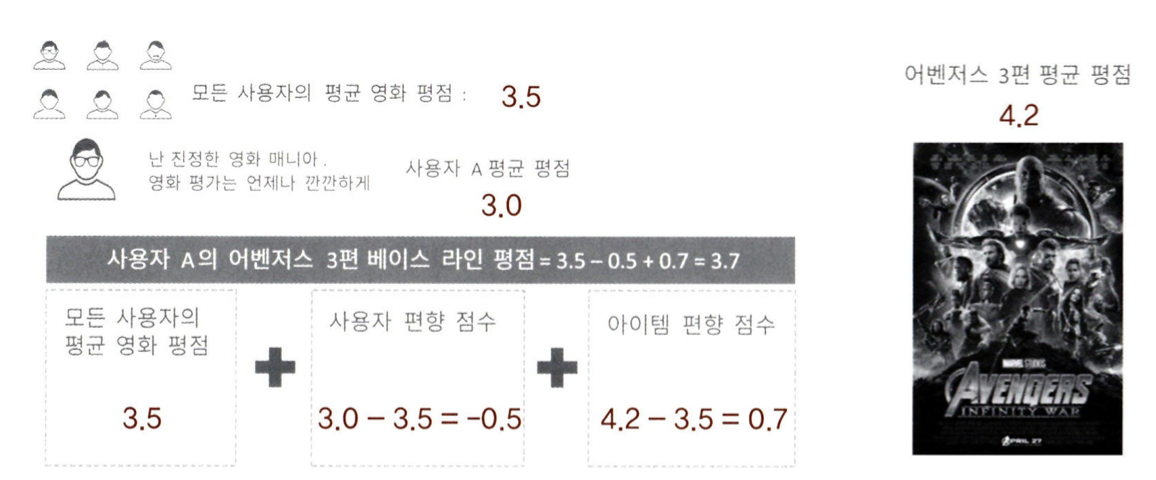

### **교차 검증과 하이퍼 파라미터 튜닝**

In [13]:
from surprise.model_selection import cross_validate

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId','rating']],reader)

algo = SVD(random_state=0)
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8751  0.8603  0.8771  0.8765  0.8753  0.8729  0.0063  
MAE (testset)     0.6731  0.6655  0.6719  0.6696  0.6717  0.6704  0.0027  
Fit time          2.90    2.16    2.08    2.74    4.29    2.83    0.79    
Test time         0.45    0.36    0.17    0.36    0.67    0.40    0.16    


{'test_rmse': array([0.87511704, 0.86032476, 0.87713056, 0.87646347, 0.87527631]),
 'test_mae': array([0.67313146, 0.66545529, 0.6719309 , 0.66962169, 0.67172954]),
 'fit_time': (2.9039831161499023,
  2.1569876670837402,
  2.0801467895507812,
  2.7410919666290283,
  4.285582065582275),
 'test_time': (0.4518754482269287,
  0.3586735725402832,
  0.17368507385253906,
  0.36178135871887207,
  0.6663370132446289)}

`cross_validate()` : 폴드별 성능 평가 수치와 전체 폴드의 평균 성능 평가 수치를 함께 보여줌

In [14]:
from surprise.model_selection import GridSearchCV

#최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20,40,60], 'n_factors':[50,100,200]}

#CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'],cv=3)
gs.fit(data)

#최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8770816335821635
{'n_epochs': 20, 'n_factors': 50}


###**Surprise를 이용한 개인화 영화 추천 시스템 구축**

Surprise는 데이터세트를 train_test_split()을 이용해 내부에서 사용하는 **TrainSet 클래스 객체**로 변환하지 않으면 fir()을 통해 학습할 수 없음

In [ ]:
# 다음 코드는 train_test_split()으로 분리되지 않는 데이터 세트에 fit()을 호출해 오류 발생
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

데이터세트 전체를 학습데이터로 사용하려면 DatasetAutoFolds 클래스 이용


In [17]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format = 'user item rating timestamp', sep=',', rating_scale=(0.5,5))
#DatasetAutoFolds 클래스를 ratings_noh.csv 파일로 생성
data_folds = DatasetAutoFolds(ratings_file='/content/drive/MyDrive/ESAA/23-1/ml-latest-small/ratings_noh.csv',reader=reader)

#전체 데이터를 학습 데이터로 생성함
trainset = data_folds.build_full_trainset()

In [18]:
#SVD 이용해 학습 수행
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [22]:
#영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/drive/MyDrive/ESAA/23-1/ml-latest-small/movies.csv')

#userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')
print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [23]:
#userId9 사용자의 추천 예상 평점
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


- 추천 대상이 되는 영화 추출 후 예측 평점 순으로 영화 추천

In [25]:
def get_unseen_surprise(ratings, movies, userId):
  # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
  seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

  # 모든 영화의 movieId를 리스트로 생성
  total_movies = movies['movieId'].tolist()

  # 모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies), '전체 영화 수:', len(total_movies))

  return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


- SVD 이용해 높은 예측 평점을 가진 순으로 영화 추천

In [26]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
  #알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(userId), str(movieId))for movieId in unseen_movies]

  #predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음
  #[Predictions(uid='9',iid='1',est=3.69),Prediction(uid='9',iid='2',est=2.98),,,,]

  #이를 est 값으로 정렬하기 위해 아래의 sortkey_est 함수를 정의함 
  #sortkey_est 함수는 list 객체의 sort()함수의 키 값으로 사용되어 정렬 수행
  def sortkey_est(pred):
    return pred.est

  #sortkey_est()반환값의 내림차순으로 정렬 수행하고 top_n개의 최상위 값 추출
  predictions.sort(key = sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  #top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 에상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

  top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

In [27]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo,9,unseen_movies, top_n=10)

print('##### Top-10 추천 영화 리스트 #####')
for top_movie in top_movie_preds:
  print(top_movie[1], ":", top_movie[2])

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


Surprise 패키지는 복잡한 알고리즘을 직접 구현하지 않고도 쉽고 간결한 API를 이용해 파이썬 기반에서 추천 시스템 구축할 수 있도록 해줌

##**09. 정리**

추천시스템의 대표적인 방식 : 콘텐츠 기반 필터링과 협업 필터링
- **콘텐츠 기반 필터링** : 아이템(상품, 영화, 서비스 등)을 구성하는 여러 콘텐츠 중 사용자가 좋아하는 콘텐츠를 필터링하여 이에 맞는 아이템을 추천하는 방식
  - 영화의 경우 장르, 감독, 영화배우, 영화 키워드와 같은 요소
- **협업 필터링** : 최근접 이웃 협업 필터링과 잠재 요인 협업 필터링
  - 최근접 이웃 협업 필터링 : 사용자 기반(사용자-사용자)과 아이템 기반(아이템-아이템)
    - 아이템 기반 최근접 이웃 방식 : 특정 아이템과 가장 근접하게 유사한 다른 아이템들을 추천하는 방식
      - 유사도의 기준이 되는 것은 사용자들의 아이템에 대한 평가를 벡터화한 값
  - 잠재 요인 협업 필터링 : 사용자-아이템 평점 행렬 데이터에 숨어 있는 잠재 요인을 추출하여 사용자가 아직 평점을 매기지 않은 아이템에 대한 평점을 예측하여 이를 추천에 반영하는 방식
    - 행렬 분해 : 다차원의 사용자-아이템 평점 행렬을 저차원의 사용자-잠재요인, 아이템-잠재요인 행렬로 분해

Surprise 패키지 : 사이킷런과 유사한 API 지향
